In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from models.cp import adaSecp_aci
np.random.seed(98765)

c:\ProgramData\Anaconda3\envs\py376_acr\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\ProgramData\Anaconda3\envs\py376_acr\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
c:\ProgramData\Anaconda3\envs\py376_acr\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding c

In [2]:
data = pd.read_csv('data/cod.csv')

col_names = data.columns
data = data.to_numpy()

covariate_col = ['1', '5', '7','25']
response_col = '30' # COD

X = data[:,np.where([t in covariate_col for t in col_names])[0]]
Y = data[:,np.where(col_names==response_col)[0]].flatten()
X = X.astype('float64')
Y = Y.astype('float64')

N = X.shape[0]
train_lag = 500 # start predicting after train_lag many observations

In [3]:
gamma_values = [0.005, 0.01, 0.05, 0.1]
lambda_values = [0.1, 1, 5, 10, 20]
k_values = [1,5, 10, 15, 20]

PI_adaSecp_aci = np.zeros((N, 2))
alpha_adaSecp_aci = np.zeros((N+1-train_lag))
erro_adaSecp_aci = np.zeros((N+1-train_lag))

alpha = 0.05


# save ave_cov and ave_width
results = {}

for gamma in gamma_values:
    
    # Create two matrices to store the results of ave_cov and ave_width separately
    cov_matrix = np.zeros((len(k_values), len(lambda_values)))
    width_matrix = np.zeros((len(k_values), len(lambda_values)))
    for i, k in enumerate(k_values):

        for j, lamda in enumerate(lambda_values):
            PI_adaSecp_aci = np.zeros((N, 2))
            alpha_adaSecp_aci = np.zeros((N+1-train_lag))
            erro_adaSecp_aci = np.zeros((N+1-train_lag))
            count = 0
            for n in tqdm(np.arange(train_lag, N), desc=f"Processing: γ={gamma}, λ={lamda}, k={k}"):

                PI_adaSecp_aci[n, :], alpha_adaSecp_aci[count+1], erro_adaSecp_aci[count], _  = adaSecp_aci(count,
                    X[(n-train_lag):n, :], Y[(n-train_lag):n], X[n:(n+1)], Y[n:(n+1)], alpha, alpha_adaSecp_aci[count], erro_adaSecp_aci, lamda, k, gamma)                                                                               
                count = count + 1
                
            cov = (PI_adaSecp_aci[train_lag:,0]<=Y[train_lag:])*\
            (PI_adaSecp_aci[train_lag:,1]>=Y[train_lag:])
            width = PI_adaSecp_aci[train_lag:,1]-PI_adaSecp_aci[train_lag:,0]

            cov_matrix[i, j] = np.mean(cov)
            width_matrix[i, j] = np.mean(width)

            print([cov_matrix[i, j],width_matrix[i, j]])
    
    # Save the result matrices under the corresponding gamma key.
    results[gamma] = {'ave_cov': cov_matrix, 'ave_width': width_matrix}


Processing: γ=0.005, λ=0.1, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.09it/s]


[0.9425, 1.3766772518746233]


Processing: γ=0.005, λ=1, k=1: 100%|██████████| 400/400 [00:05<00:00, 79.57it/s]


[0.95, 1.315102602606143]


Processing: γ=0.005, λ=5, k=1: 100%|██████████| 400/400 [00:05<00:00, 79.35it/s]


[0.9625, 1.2742785070741773]


Processing: γ=0.005, λ=10, k=1: 100%|██████████| 400/400 [00:05<00:00, 78.19it/s]


[0.9675, 1.2571045035518984]


Processing: γ=0.005, λ=20, k=1: 100%|██████████| 400/400 [00:05<00:00, 78.18it/s]


[0.9675, 1.2579801451954007]


Processing: γ=0.005, λ=0.1, k=5: 100%|██████████| 400/400 [00:05<00:00, 78.76it/s]


[0.9425, 1.3766917105456344]


Processing: γ=0.005, λ=1, k=5: 100%|██████████| 400/400 [00:04<00:00, 82.05it/s]


[0.9475, 1.32953538932451]


Processing: γ=0.005, λ=5, k=5: 100%|██████████| 400/400 [00:04<00:00, 81.43it/s]


[0.95, 1.2993574249440434]


Processing: γ=0.005, λ=10, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.53it/s]


[0.9575, 1.2712898634670473]


Processing: γ=0.005, λ=20, k=5: 100%|██████████| 400/400 [00:05<00:00, 79.93it/s]


[0.9625, 1.2644289101378308]


Processing: γ=0.005, λ=0.1, k=10: 100%|██████████| 400/400 [00:05<00:00, 79.13it/s]


[0.9425, 1.3762816187186315]


Processing: γ=0.005, λ=1, k=10: 100%|██████████| 400/400 [00:04<00:00, 80.71it/s]


[0.945, 1.359779914875321]


Processing: γ=0.005, λ=5, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.32it/s]


[0.95, 1.3126287734886446]


Processing: γ=0.005, λ=10, k=10: 100%|██████████| 400/400 [00:04<00:00, 82.06it/s]


[0.9575, 1.2668431318966173]


Processing: γ=0.005, λ=20, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.57it/s]


[0.965, 1.2549661602609004]


Processing: γ=0.005, λ=0.1, k=15: 100%|██████████| 400/400 [00:05<00:00, 79.42it/s]


[0.9425, 1.3762998183429282]


Processing: γ=0.005, λ=1, k=15: 100%|██████████| 400/400 [00:05<00:00, 78.75it/s]


[0.945, 1.3599536664594583]


Processing: γ=0.005, λ=5, k=15: 100%|██████████| 400/400 [00:05<00:00, 79.14it/s]


[0.945, 1.3401218582215841]


Processing: γ=0.005, λ=10, k=15: 100%|██████████| 400/400 [00:05<00:00, 78.19it/s]


[0.9475, 1.3003943227987305]


Processing: γ=0.005, λ=20, k=15: 100%|██████████| 400/400 [00:05<00:00, 76.66it/s]


[0.9575, 1.2718011755517533]


Processing: γ=0.005, λ=0.1, k=20: 100%|██████████| 400/400 [00:05<00:00, 78.48it/s]


[0.9425, 1.3762796671944986]


Processing: γ=0.005, λ=1, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.89it/s]


[0.9425, 1.3747145599647999]


Processing: γ=0.005, λ=5, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.74it/s]


[0.945, 1.361427967636206]


Processing: γ=0.005, λ=10, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.48it/s]


[0.945, 1.3323212696061817]


Processing: γ=0.005, λ=20, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.22it/s]


[0.9525, 1.2970418179567098]


Processing: γ=0.01, λ=0.1, k=1: 100%|██████████| 400/400 [00:05<00:00, 79.52it/s]


[0.9475, 1.41374672001171]


Processing: γ=0.01, λ=1, k=1: 100%|██████████| 400/400 [00:05<00:00, 79.34it/s]


[0.95, 1.3654062170248364]


Processing: γ=0.01, λ=5, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.41it/s]


[0.9625, 1.2538211744413807]


Processing: γ=0.01, λ=10, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.20it/s]


[0.965, 1.237043841732949]


Processing: γ=0.01, λ=20, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.01it/s]


[0.965, 1.2400066086912225]


Processing: γ=0.01, λ=0.1, k=5: 100%|██████████| 400/400 [00:05<00:00, 79.10it/s]


[0.9475, 1.4137820983575489]


Processing: γ=0.01, λ=1, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.75it/s]


[0.95, 1.367222542935175]


Processing: γ=0.01, λ=5, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.37it/s]


[0.9525, 1.2855345075731972]


Processing: γ=0.01, λ=10, k=5: 100%|██████████| 400/400 [00:04<00:00, 81.66it/s]


[0.955, 1.2602970715288553]


Processing: γ=0.01, λ=20, k=5: 100%|██████████| 400/400 [00:04<00:00, 81.17it/s]


[0.9625, 1.2464655870542742]


Processing: γ=0.01, λ=0.1, k=10: 100%|██████████| 400/400 [00:04<00:00, 80.64it/s]


[0.9475, 1.4133461416250008]


Processing: γ=0.01, λ=1, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.05it/s]


[0.95, 1.4017041207600704]


Processing: γ=0.01, λ=5, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.12it/s]


[0.95, 1.3671746484411589]


Processing: γ=0.01, λ=10, k=10: 100%|██████████| 400/400 [00:04<00:00, 80.29it/s]


[0.9525, 1.2864757542885175]


Processing: γ=0.01, λ=20, k=10: 100%|██████████| 400/400 [00:05<00:00, 79.28it/s]


[0.96, 1.2479588206838566]


Processing: γ=0.01, λ=0.1, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.17it/s]


[0.9475, 1.413354741701815]


Processing: γ=0.01, λ=1, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.55it/s]


[0.9475, 1.4148373719368827]


Processing: γ=0.01, λ=5, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.92it/s]


[0.9475, 1.4171957135301392]


Processing: γ=0.01, λ=10, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.81it/s]


[0.945, 1.370440697961004]


Processing: γ=0.01, λ=20, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.41it/s]


[0.955, 1.2682984684716614]


Processing: γ=0.01, λ=0.1, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.45it/s]


[0.9475, 1.4133678592258092]


Processing: γ=0.01, λ=1, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.91it/s]


[0.9475, 1.414817896314225]


Processing: γ=0.01, λ=5, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.11it/s]


[0.9475, 1.4173639505857696]


Processing: γ=0.01, λ=10, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.56it/s]


[0.945, 1.381300716082865]


Processing: γ=0.01, λ=20, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.35it/s]


[0.9525, 1.3091480977749093]


Processing: γ=0.05, λ=0.1, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.47it/s]


[0.95, 1.3992142019013096]


Processing: γ=0.05, λ=1, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.65it/s]


[0.95, 1.4037891277638062]


Processing: γ=0.05, λ=5, k=1: 100%|██████████| 400/400 [00:05<00:00, 79.01it/s]


[0.955, 1.2695821417928979]


Processing: γ=0.05, λ=10, k=1: 100%|██████████| 400/400 [00:05<00:00, 79.90it/s]


[0.955, 1.187402696460303]


Processing: γ=0.05, λ=20, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.68it/s]


[0.96, 1.1558729428387151]


Processing: γ=0.05, λ=0.1, k=5: 100%|██████████| 400/400 [00:05<00:00, 69.66it/s]


[0.95, 1.3990243503354858]


Processing: γ=0.05, λ=1, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.11it/s]


[0.9475, 1.4026664042481862]


Processing: γ=0.05, λ=5, k=5: 100%|██████████| 400/400 [00:05<00:00, 79.87it/s]


[0.95, 1.3342493053025262]


Processing: γ=0.05, λ=10, k=5: 100%|██████████| 400/400 [00:05<00:00, 79.94it/s]


[0.9525, 1.29597417675551]


Processing: γ=0.05, λ=20, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.64it/s]


[0.9525, 1.270195097535775]


Processing: γ=0.05, λ=0.1, k=10: 100%|██████████| 400/400 [00:04<00:00, 80.62it/s]


[0.95, 1.433696265124374]


Processing: γ=0.05, λ=1, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.17it/s]


[0.9475, 1.4003623350895582]


Processing: γ=0.05, λ=5, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.23it/s]


[0.9475, 1.4277691970624253]


Processing: γ=0.05, λ=10, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.24it/s]


[0.95, 1.3393654178231287]


Processing: γ=0.05, λ=20, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.45it/s]


[0.9525, 1.2868710911376495]


Processing: γ=0.05, λ=0.1, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.49it/s]


[0.95, 1.4337104399161609]


Processing: γ=0.05, λ=1, k=15: 100%|██████████| 400/400 [00:05<00:00, 79.83it/s]


[0.9475, 1.4320609959950497]


Processing: γ=0.05, λ=5, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.24it/s]


[0.9475, 1.428114315701485]


Processing: γ=0.05, λ=10, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.38it/s]


[0.9475, 1.385046890386817]


Processing: γ=0.05, λ=20, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.46it/s]


[0.9525, 1.3125901338807295]


Processing: γ=0.05, λ=0.1, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.86it/s]


[0.95, 1.4337228891079414]


Processing: γ=0.05, λ=1, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.13it/s]


[0.9475, 1.4321373901710046]


Processing: γ=0.05, λ=5, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.47it/s]


[0.9475, 1.4286283472972838]


Processing: γ=0.05, λ=10, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.30it/s]


[0.9475, 1.3862191817767981]


Processing: γ=0.05, λ=20, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.31it/s]


[0.95, 1.3655394014980706]


Processing: γ=0.1, λ=0.1, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.10it/s]


[0.9475, 1.3994445503730302]


Processing: γ=0.1, λ=1, k=1: 100%|██████████| 400/400 [00:04<00:00, 81.51it/s]


[0.95, 1.4008994678760838]


Processing: γ=0.1, λ=5, k=1: 100%|██████████| 400/400 [00:04<00:00, 81.03it/s]


[0.9525, 1.2714053519115196]


Processing: γ=0.1, λ=10, k=1: 100%|██████████| 400/400 [00:04<00:00, 80.77it/s]


[0.9525, 1.1955900572538551]


Processing: γ=0.1, λ=20, k=1: 100%|██████████| 400/400 [00:04<00:00, 81.04it/s]


[0.955, 1.1470738184365499]


Processing: γ=0.1, λ=0.1, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.86it/s]


[0.9475, 1.3993918282332265]


Processing: γ=0.1, λ=1, k=5: 100%|██████████| 400/400 [00:04<00:00, 81.21it/s]


[0.9475, 1.3993070772254879]


Processing: γ=0.1, λ=5, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.19it/s]


[0.95, 1.3749446790481124]


Processing: γ=0.1, λ=10, k=5: 100%|██████████| 400/400 [00:04<00:00, 80.86it/s]


[0.95, 1.3085393954304354]


Processing: γ=0.1, λ=20, k=5: 100%|██████████| 400/400 [00:04<00:00, 81.50it/s]


[0.95, 1.3116283476597124]


Processing: γ=0.1, λ=0.1, k=10: 100%|██████████| 400/400 [00:04<00:00, 81.09it/s]


[0.9475, 1.3992504431978166]


Processing: γ=0.1, λ=1, k=10: 100%|██████████| 400/400 [00:05<00:00, 79.61it/s]


[0.9475, 1.3988397568645456]


Processing: γ=0.1, λ=5, k=10: 100%|██████████| 400/400 [00:04<00:00, 80.06it/s]


[0.95, 1.400059632903077]


Processing: γ=0.1, λ=10, k=10: 100%|██████████| 400/400 [00:04<00:00, 80.88it/s]


[0.95, 1.3416020927157075]


Processing: γ=0.1, λ=20, k=10: 100%|██████████| 400/400 [00:05<00:00, 79.68it/s]


[0.95, 1.2835230295035998]


Processing: γ=0.1, λ=0.1, k=15: 100%|██████████| 400/400 [00:04<00:00, 80.89it/s]


[0.9475, 1.39913583124461]


Processing: γ=0.1, λ=1, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.43it/s]


[0.9475, 1.3985932063988522]


Processing: γ=0.1, λ=5, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.50it/s]


[0.9475, 1.4276708873942061]


Processing: γ=0.1, λ=10, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.54it/s]


[0.95, 1.406620177929289]


Processing: γ=0.1, λ=20, k=15: 100%|██████████| 400/400 [00:04<00:00, 81.38it/s]


[0.95, 1.3025360848375747]


Processing: γ=0.1, λ=0.1, k=20: 100%|██████████| 400/400 [00:04<00:00, 81.42it/s]


[0.9475, 1.3991608396545494]


Processing: γ=0.1, λ=1, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.88it/s]


[0.9475, 1.3988626156239496]


Processing: γ=0.1, λ=5, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.56it/s]


[0.9475, 1.4248558117599226]


Processing: γ=0.1, λ=10, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.48it/s]


[0.95, 1.4065504068019892]


Processing: γ=0.1, λ=20, k=20: 100%|██████████| 400/400 [00:04<00:00, 80.92it/s]

[0.95, 1.2944300241744253]


In [4]:
# print results
for gamma, data in results.items():
    print(f"Gamma: {gamma}")
    print("Ave_Cov Matrix:")
    print(data['ave_cov'])
    print("Ave_Width Matrix:")
    print(data['ave_width'])
    print()

Gamma: 0.005
Ave_Cov Matrix:
[[0.9425 0.95   0.9625 0.9675 0.9675]
 [0.9425 0.9475 0.95   0.9575 0.9625]
 [0.9425 0.945  0.95   0.9575 0.965 ]
 [0.9425 0.945  0.945  0.9475 0.9575]
 [0.9425 0.9425 0.945  0.945  0.9525]]
Ave_Width Matrix:
[[1.37667725 1.3151026  1.27427851 1.2571045  1.25798015]
 [1.37669171 1.32953539 1.29935742 1.27128986 1.26442891]
 [1.37628162 1.35977991 1.31262877 1.26684313 1.25496616]
 [1.37629982 1.35995367 1.34012186 1.30039432 1.27180118]
 [1.37627967 1.37471456 1.36142797 1.33232127 1.29704182]]

Gamma: 0.01
Ave_Cov Matrix:
[[0.9475 0.95   0.9625 0.965  0.965 ]
 [0.9475 0.95   0.9525 0.955  0.9625]
 [0.9475 0.95   0.95   0.9525 0.96  ]
 [0.9475 0.9475 0.9475 0.945  0.955 ]
 [0.9475 0.9475 0.9475 0.945  0.9525]]
Ave_Width Matrix:
[[1.41374672 1.36540622 1.25382117 1.23704384 1.24000661]
 [1.4137821  1.36722254 1.28553451 1.26029707 1.24646559]
 [1.41334614 1.40170412 1.36717465 1.28647575 1.24795882]
 [1.41335474 1.41483737 1.41719571 1.3704407  1.26829847]
 

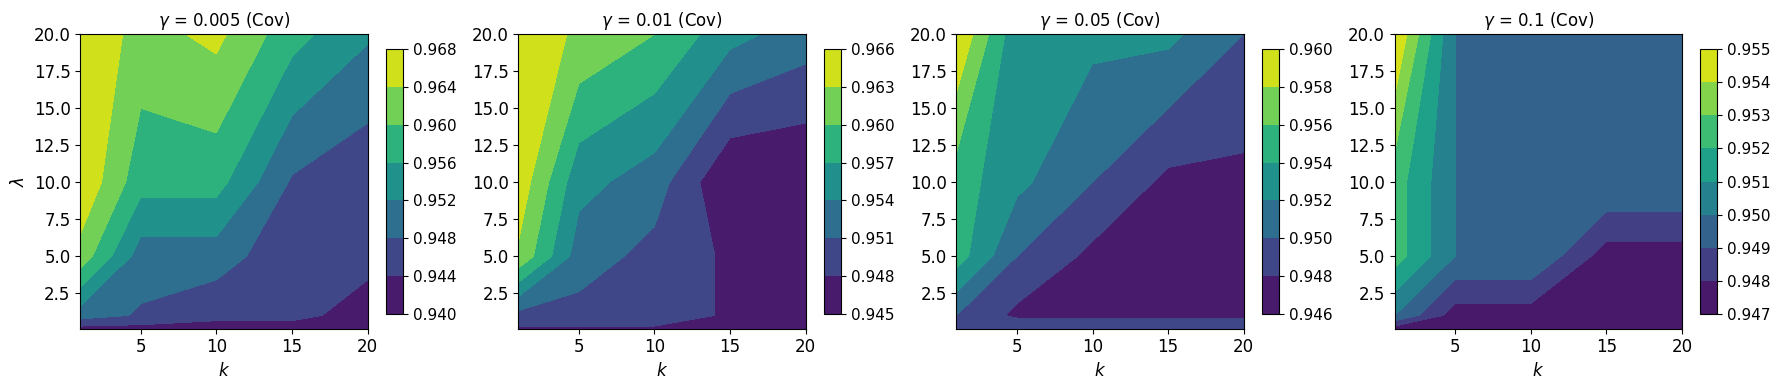

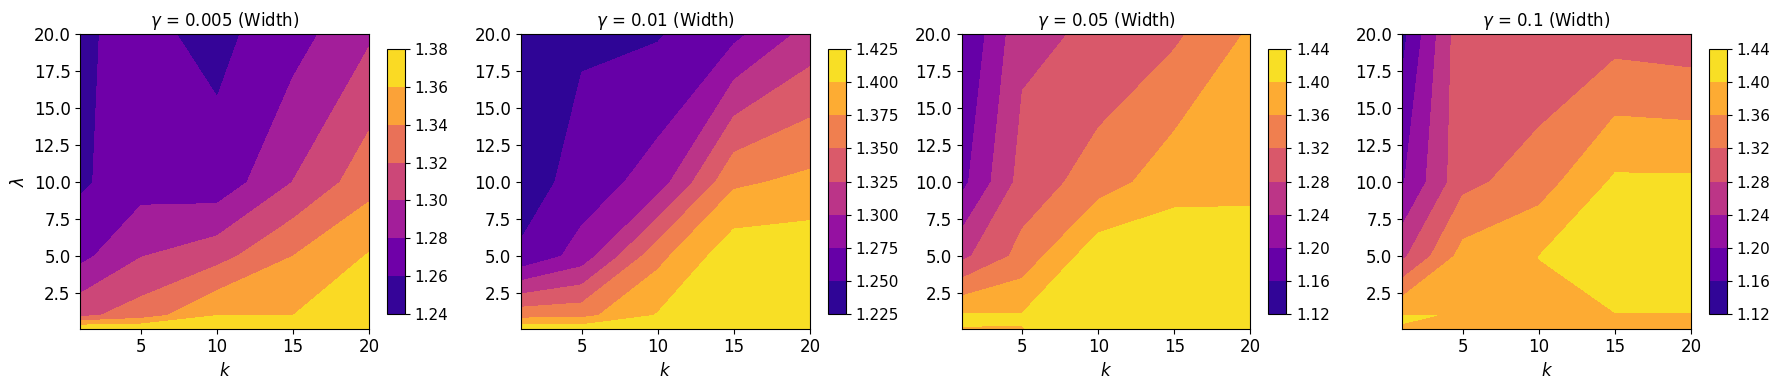

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# coverage
fig_cov = plt.figure(figsize=(18, 4))

for idx, (gamma, data) in enumerate(results.items()):
    cov_matrix = data['ave_cov']
    
    ax_cov = fig_cov.add_subplot(1, 4, idx + 1)
    
    contour_cov = ax_cov.contourf(k_values, lambda_values, cov_matrix.T, cmap='viridis')
    ax_cov.set_title(f'$\gamma$ = {gamma} (Cov)', fontsize=12)
    ax_cov.set_xlabel('$k$', fontsize=12)
    if idx == 0:
        ax_cov.set_ylabel('$\lambda$', fontsize=12)

    ax_cov.tick_params(axis='both', which='major', labelsize=12)  
    cbar_cov = fig_cov.colorbar(contour_cov, ax=ax_cov, shrink=0.9, aspect=15, pad=0.05)
    cbar_cov.ax.tick_params(labelsize=11)  
    cbar_cov.ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.tight_layout()
plt.subplots_adjust(wspace=0.22, hspace=0.22) 
plt.savefig('./fig/COD_SA_cov_95', dpi=500, bbox_inches='tight')
plt.show()

# width
fig_width = plt.figure(figsize=(18, 4))

for idx, (gamma, data) in enumerate(results.items()):
    width_matrix = data['ave_width']

    ax_width = fig_width.add_subplot(1, 4, idx + 1)
    
    contour_width = ax_width.contourf(k_values, lambda_values, width_matrix.T, cmap='plasma')
    ax_width.set_title(f'$\gamma$ = {gamma} (Width)', fontsize=12)
    ax_width.set_xlabel('$k$', fontsize=12)
    if idx == 0:
        ax_width.set_ylabel('$\lambda$', fontsize=12)

    ax_width.tick_params(axis='both', which='major', labelsize=12)

    cbar_width = fig_width.colorbar(contour_width, ax=ax_width, shrink=0.9, aspect=15, pad=0.05)
    cbar_width.ax.tick_params(labelsize=11)  
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.22, hspace=0.22) 
plt.savefig('./fig/COD_SA_width_95', dpi=500, bbox_inches='tight')
plt.show()